# Zeta Disease Prediction

### The following classifiers are used here
1. Logistic Regression Classifier
2. Random Forest classifier
3. Naive Bayes Classifier
4. K Nearest Neighbour Classifier
5. SVM Classifier
6. Artificial Neural Network (ANN)

#### For every classfier the Confusion Matrix and Accuracy calculated
#### At the end the ROC is calculated to choose the best classifier

In [1]:
# Set the working directory
import os
os.chdir(r'D:\2_p\p\Studies\DS\Car\carriercorporationtakehomechallenge')

In [43]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
%matplotlib inline

## Exploring the Training data

In [3]:
# Read the data file
df_train = pd.read_csv(r'2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')
df_train.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [4]:
# Let us check the size of the data frame
df_train.shape

(800, 9)

### Train data frame has 8 coloumns ( 8 are independent variables and 1 dependent variable )

In [5]:
# let us print the column names
df_train.columns.values

array(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'], dtype=object)

In [6]:
# print info to check is there any null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [7]:
df_train.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

### There are no null values

In [8]:
# let us check the standard deviation, min and mac values etc.
df_train.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


### From the above we notice that the standard devivation of the independent variables varying from 0.348711	 liver_stress_test)  to 126.333656 ( insulin_test ). 

In [9]:
# Let us re-check the unique values dependent variable 
df_train.zeta_disease.unique()

array([0, 1], dtype=int64)

### We noticed the there are two unique values only ( 1 = Yes and 0 = No )

In [10]:
# Let us count the unique values
df_train.zeta_disease.value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

### We can notice that there 521 data points with 'No' and 279 data points with with 'Yes' .

In [11]:
corr = df_train.corr()
corr

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,0.157705,0.035347,0.193066,-0.034294,0.042416,-0.106039,0.372373,0.192925
weight,0.157705,1.000000,0.214262,0.122349,0.304295,0.146779,0.053629,0.100834,0.471155
bmi,0.035347,0.214262,1.000000,0.240513,0.217265,0.116649,0.264861,0.028683,0.271856
blood_pressure,0.193066,0.122349,0.240513,1.000000,0.079425,0.045764,0.193221,0.095613,0.045739
insulin_test,-0.034294,0.304295,0.217265,0.079425,1.000000,0.175230,0.417894,-0.006292,0.126504
liver_stress_test,0.042416,0.146779,0.116649,0.045764,0.175230,1.000000,0.172048,0.021817,0.184738
cardio_stress_test,-0.106039,0.053629,0.264861,0.193221,0.417894,0.172048,1.000000,-0.080358,0.036090
years_smoking,0.372373,0.100834,0.028683,0.095613,-0.006292,0.021817,-0.080358,1.000000,0.195261
zeta_disease,0.192925,0.471155,0.271856,0.045739,0.126504,0.184738,0.036090,0.195261,1.000000


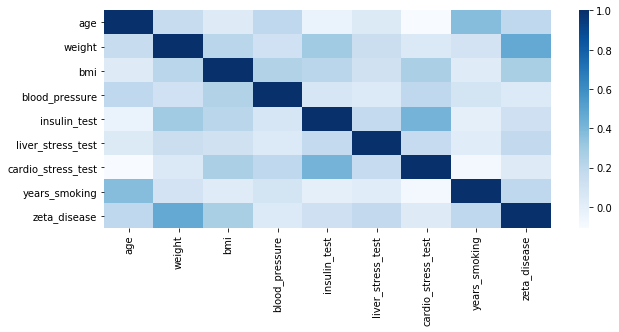

In [12]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, cmap='Blues')

In [13]:
df_train.skew()

age                   2.031742
weight                0.734588
bmi                   0.605968
blood_pressure       -1.357085
insulin_test          2.827382
liver_stress_test     2.330998
cardio_stress_test    0.148022
years_smoking         3.037747
zeta_disease          0.635931
dtype: float64

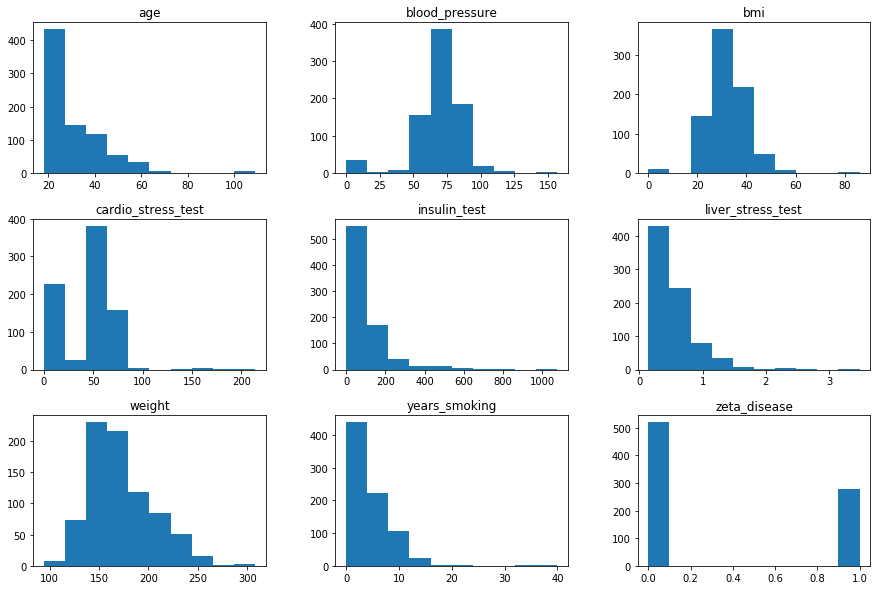

In [14]:
hist_train=df_train.hist(bins=10, figsize=(15, 10),grid=False)

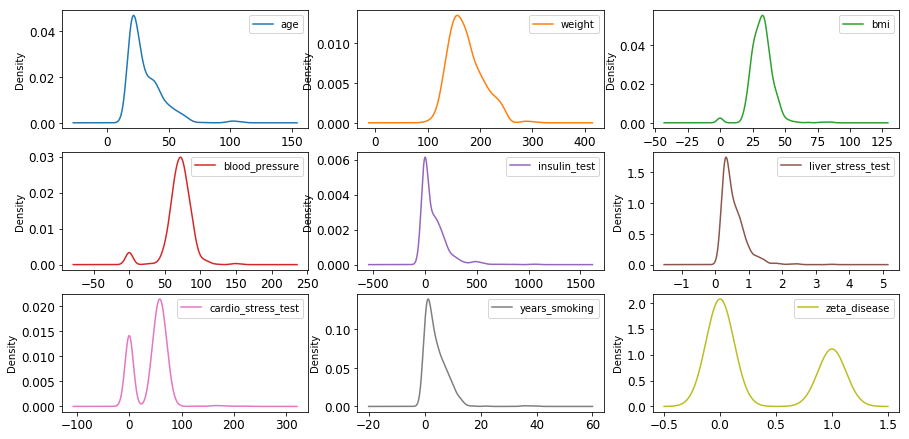

In [15]:
plt = df_train.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=12, figsize=(15,10))

In [16]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=27)

scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

scaler =StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

## Read the Prediction data

In [17]:
df_pred = pd.read_csv(r'2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')
df_pred.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [18]:
df_pred.shape

(20, 9)

In [19]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20 non-null     int64  
 1   weight              20 non-null     int64  
 2   bmi                 20 non-null     float64
 3   blood_pressure      20 non-null     int64  
 4   insulin_test        20 non-null     int64  
 5   liver_stress_test   20 non-null     float64
 6   cardio_stress_test  20 non-null     int64  
 7   years_smoking       20 non-null     int64  
 8   zeta_disease        0 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


In [20]:
x_pred = df_pred[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
scaler =StandardScaler()
x_pred_scaled = scaler.fit_transform(x_pred)

# Using Logistic Regression

## Build a Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
lrClassifier= LogisticRegression(max_iter=10000)
lrClassifier.fit(x_train_scaled,y_train)
y_pred=lrClassifier.predict(x_test_scaled)

In [22]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,112,12
1,36,40


In [23]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.76


In [24]:
#  Now, we train with the entire model
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

lrClassifier= LogisticRegression(max_iter=10000)
lrClassifier.fit(x_scaled,y);

In [25]:
# Let us do the prediction using test data
y_pred=lrClassifier.predict(x_pred_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### Appending the predicted values to  '_zeta-disease_prediction-data_' dataset

In [26]:
df_predicted = x_pred
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier=RandomForestClassifier(random_state = 27)
rfClassifier.fit(x_train_scaled,y_train)
y_pred=rfClassifier.predict(x_test_scaled)

In [28]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,108,16
1,33,43


In [29]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.755


###  Now we will train with the entire model

In [30]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

rfClassifier = RandomForestClassifier(random_state = 27)
rfClassifier.fit(x_scaled,y);

### Let us do the prediction using Predict data

In [31]:
y_pred=rfClassifier.predict(x_pred_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

### Appending the predicted values to  '_zeta-disease_prediction-data_' dataset

In [32]:
df_predicted = x_pred
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,0
4,60,193,29.8,62,192,1.7798,65,9,0
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


# Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB  
nbClassifier = GaussianNB()  
nbClassifier.fit(x_train_scaled, y_train)  
y_pred = nbClassifier.predict(x_test_scaled)

In [34]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,110,14
1,35,41


In [35]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.755


###  Now we will train with the entire model

In [36]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

nbClassifier = GaussianNB()
nbClassifier.fit(x_scaled,y);

### Let us do the prediction using test data

In [37]:
y_pred=nbClassifier.predict(x_pred_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

### Appending the predicted values to  '_zeta-disease_prediction-data_' dataset

In [38]:
df_predicted = x_pred
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,0
4,60,193,29.8,62,192,1.7798,65,9,0
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


# KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Let us find the best K
training = [] 
scores = {} 
K = []
test = [] 
  
for k in range(2, 40): 
    knnClassifier = KNeighborsClassifier(n_neighbors = k) 
    knnClassifier.fit(x_train_scaled, y_train) 
  
    trainingscore = knnClassifier.score(x_train_scaled, y_train) 
    testscore = knnClassifier.score(x_test_scaled, y_test) 
    K.append(k) 
  
    training.append(trainingscore) 
    test.append(testscore) 
    scores[k] = [trainingscore, testscore] 

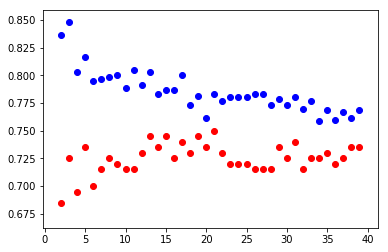

In [44]:
# determining the best K
plt.scatter(K, test, color ='r') 
plt.scatter(K, training, color ='b') 
plt.show() 

In [45]:
knnClassifier = KNeighborsClassifier(n_neighbors = 21)  
knnClassifier.fit(x_train_scaled, y_train)
y_pred = knnClassifier.predict(x_test_scaled)

In [46]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,113,11
1,39,37


In [47]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.75


In [48]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

knnClassifier = KNeighborsClassifier(n_neighbors = 21) 
knnClassifier.fit(x_scaled,y);


In [49]:
y_pred=knnClassifier.predict(x_pred_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [50]:
df_predicted = x_pred
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,0
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


# SVM Classifier

In [51]:
from sklearn import svm
svmClassifier = svm.SVC(kernel='linear', probability=True) 
svmClassifier.fit(x_train_scaled, y_train)
y_pred = svmClassifier.predict(x_test_scaled)

In [52]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,113,11
1,35,41


In [53]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.77


### Now we will train with the entire model¶

In [54]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

svmClassifier = svm.SVC(kernel='linear', probability=True) 
svmClassifier.fit(x_scaled,y);

### Let us do the prediction using test data

In [55]:
y_pred=svmClassifier.predict(x_pred_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### Appending the predicted values to 'zeta-diseaseprediction-data_' dataset

In [56]:
df_predicted = x_pred
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


# Artificial neural network(ANN)

In [57]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [58]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping_cb = EarlyStopping(     
    monitor='acc',
    min_delta=0, 
    patience=5, 
    verbose=0, 
    mode='auto', 
    baseline=None, 
    restore_best_weights=True 
)

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_scaled, y_train, epochs=200, callbacks=[earlystopping_cb])
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print('Test accuracy:', test_acc)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
600/600 [==============================] - 1s 906us/sample - loss: 0.6542 - acc: 0.6733
Epoch 2/200
600/600 [==============================] - 0s 78us/sample - loss: 0.6182 - acc: 0.6900
Epoch 3/200
600/600 [==============================] - 0s 80us/sample - loss: 0.5774 - acc: 0.7050
Epoch 4/200
600/600 [==============================] - 0s 118us/sample - loss: 0.5391 - acc: 0.7433
Epoch 5/200
600/600 [==============================] - 0s 115us/sample - loss: 0.5099 - acc: 0.7500
Epoch 6/200
600/600 [==============================] - 0s 112us/sample - loss: 0.4915 - acc: 0.7683
Epoch 7/200
600/600 [==============================] - 0s 116us/sample - loss: 0.4799 - acc: 0.7733
Epoch 8/200
600/600 [==============================] - 0s 121us/sample - loss: 0.4724 - acc: 0.7883
Epoch 9/200
600/600 [==============================] - 0s 122us/sample - loss: 0.4673 - acc: 0.7883
Epoch 10/200
600/600 [==============================] 

In [61]:
y_pred = model.predict_classes(x_test_scaled)
y_pred = y_pred.ravel() 

In [62]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,105,19
1,29,47


In [63]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.76


In [64]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

y_pred = model.predict_classes(x_pred_scaled)
y_pred = y_pred.ravel() 

In [65]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [66]:
df_predicted = x_pred
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,0
9,19,193,25.8,84,66,1.7938,50,3,0


# ROC : Receiver Operating Characteristic Curve

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


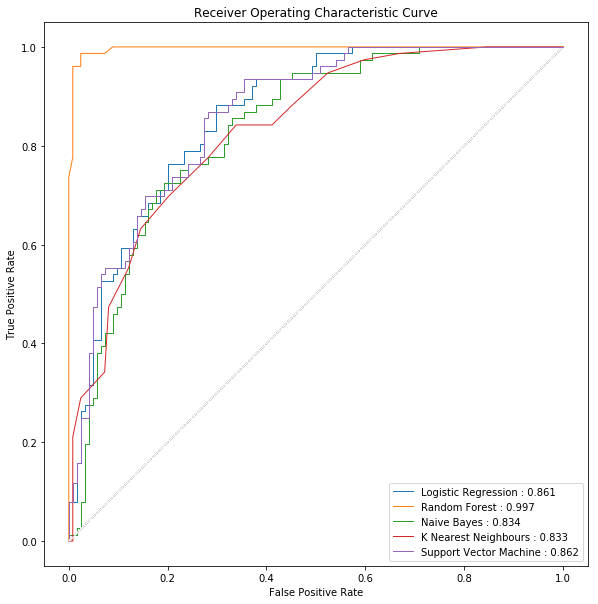

In [67]:
plt.figure(figsize=(10,10))

# Logistic Regression Classifier
probas_lr = lrClassifier.predict_proba(x_test_scaled)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probas_lr[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=1, label='Logistic Regression : %0.3f' % (roc_auc_lr))
plt.plot([0, 1], [0, 1], '--', color=(0.2, 0.2, 0.2))

# Random Forest Classifier
probas_rf = rfClassifier.predict_proba(x_test_scaled)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probas_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=1, label='Random Forest : %0.3f' % (roc_auc_rf))
plt.plot([0, 1], [0, 1], '--', color=(0.4, 0.4, 0.4))

# Naive Bayes Classifier
probas_nb = nbClassifier.predict_proba(x_test_scaled)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probas_nb[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, lw=1, label='Naive Bayes : %0.3f' % (roc_auc_nb))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))

# KNN Classifier
probas_knn = knnClassifier.predict_proba(x_test_scaled)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probas_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, lw=1, label='K Nearest Neighbours : %0.3f' % (roc_auc_knn))
plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))

# SVM Classifier
probas_svm = svmClassifier.predict_proba(x_test_scaled)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probas_svm[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, lw=1, label='Support Vector Machine : %0.3f' % (roc_auc_svm))
plt.plot([0, 1], [0, 1], '--', color=(1.0, 1.0, 1.0))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.axes().set_aspect(1)